### Imports

In [1]:
import pytrends
import numpy as np
import pandas as pd
import requests
import lxml
import datetime
from datetime import date
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


num = 3000
pd.set_option('display.max_columns', num)
pd.set_option('display.max_rows', num)
pd.set_option('display.max_colwidth', num)


### Functions

In [2]:
def query_entry(num_queries):

    """
    Get user input for queries
    """
    query_list = []
    
    i = 0

    for i in range(num_queries):
        query_list.append(input("Please enter keyword for query: "))
        
    return query_list

In [3]:
def num_of_queries():
    
    """
    Get number of queries
    """
    num = int(input("Please enter number of queries to search and compare(max 5): "))

    if num > 5 or num < 0:
        while num > 5 or num < 0:
            num = int(input("Please enter number of queries to search and compare(max 5): "))


    return num
    

### Opens Google.Trends request

In [4]:
from pytrends.request import TrendReq

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq(hl='en-US', tz=360, timeout=(10,25), retries=2, backoff_factor=0.3)

master_df = pd.DataFrame()

### Payload Customization Section

In [5]:
# Create payload and capture API tokens. 
# Only needed for interest_over_time(), interest_by_region() & related_queries()
# Up to five terms in a list

# Either start from today and go back up to 5 years, #-(H, d, m, y) for # of Hours, days, months, or years
# OR give a timeframe of two dates in 'YYYY-MM-DD YYYY-MM-DD' format
# If Given a 500 error code, it is Google issue with query, may see request as spam or sketchy code
# OR data is unavailable for timeframe
user_timeframe = 'today 12-m' 

#Country of interest, leave empty for global interest
user_geo = 'US'

user_kw_list = []

num_queries = num_of_queries()

user_kw_list = query_entry(num_queries)

Please enter number of queries to search and compare(max 5): 5
Please enter keyword for query: Joe Biden
Please enter keyword for query: Amy Klobuchar
Please enter keyword for query: Tom Steyer
Please enter keyword for query: Andrew Yang
Please enter keyword for query: Elizabeth Warren


### API use

In [6]:
#Builds trend data pull
pytrend.build_payload(kw_list = user_kw_list, timeframe = user_timeframe, geo=user_geo)

### Interest Over Time Comparison

In [7]:
# Interest Over Time
# Google Trends does not relay specific view counts of topics.
# Simply, the numbers correlate to relative virality of a topic,
# where 100 is maximum trend and 0 is minimum trend

# interest over time provides weekly intervals for trend analysis
interest_over_time_df = pytrend.interest_over_time()
interest_over_time_df

,Joe Biden,Amy Klobuchar,Tom Steyer,Andrew Yang,Elizabeth Warren,isPartial
date,,,,,,
2019-06-02,6,0,0,2,6,False
2019-06-09,9,0,0,3,6,False
2019-06-16,10,1,0,3,6,False
2019-06-23,20,3,0,16,17,False
2019-06-30,9,1,0,5,6,False
2019-07-07,5,1,5,3,4,False
2019-07-14,5,1,2,3,4,False
2019-07-21,4,0,1,3,4,False
2019-07-28,15,2,2,17,13,False


### Interest Over Time Plot

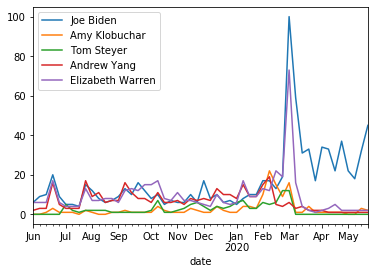

In [8]:
interest_over_time_df.plot()

### Interest by Region

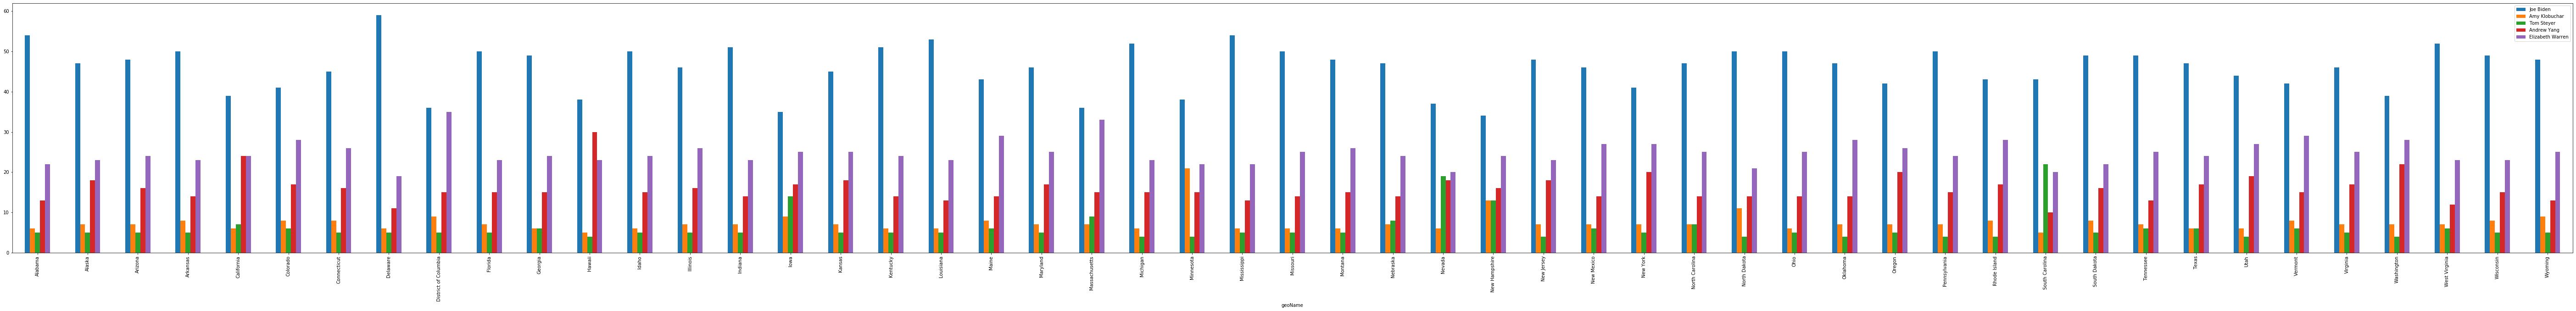

In [9]:
# Interest by Region
# The values are calculated on a scale from 0 to 100, 
# where 100 is the location with the most popularity as a fraction of total 
# searches in that location, a value of 50 indicates a location which is half as popular. 
# A value of 0 indicates a location where there was not enough data for this term.
interest_by_region_df = pytrend.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)

#Plots interest by region per state within selected timeframe
interest_by_region_df.plot(figsize=(100, 10), kind ='bar')

    

### Related Queries, which requires payload with only one item

In [10]:

# Related Queries, returns a dictionary of dataframes

# For Top, values are calculated on a scale from 0 to 100, 
# where 100 is the location with the most popularity as a fraction of total 
# searches in that location, a value of 50 indicates a location which is half as popular. 
# A value of 0 indicates a location where there was not enough data for this term.

# For Rising, the values are uncertain but may be interpreted as rounded searches for timeframe
# related_query = []

# related_query.append(input("Insert Search Query for Top Related and Rising Related Searches: "))

i = 0
related_list = []
column_names = []
frames_master = pd.DataFrame(related_list)
pytrend.build_payload(kw_list = user_kw_list, timeframe = user_timeframe, geo=user_geo)   

# Uses the keyword to find trending searches over preset time period
related_queries_dict = pytrend.related_queries()
for i in range(num_queries):
    #Top List maxes out at 100
    related_top = pd.DataFrame(related_queries_dict[user_kw_list[i]]['top'])
    #Rising List is a percentage increase in searches over preset time period
    related_rising = pd.DataFrame(related_queries_dict[user_kw_list[i]]['rising'])
    
    # adding values to results list for top and rising results
    related_list.append(related_top)
    related_list.append(related_rising)
    frames_master = pd.concat(related_list, axis=1)
    
    #Customizing column names for readability
    column_names.append(user_kw_list[i] + ' top')
    column_names.append('rank')
    column_names.append(user_kw_list[i] + ' rising')
    column_names.append('percent increase')

frames_master.columns = column_names
frames_master

,Joe Biden top,rank,Joe Biden rising,percent increase,Amy Klobuchar top,rank,Amy Klobuchar rising,percent increase,Tom Steyer top,rank,Tom Steyer rising,percent increase,Andrew Yang top,rank,Andrew Yang rising,percent increase,Elizabeth Warren top,rank,Elizabeth Warren rising,percent increase
0,bernie,100,joe biden coronavirus,231800,is amy klobuchar,100,amy klobuchar dropping out,181500,tom steyer worth,100,debate,350450,andrew yang polls,100,new hampshire primary,36750,bernie,100,delegate count,34300
1,trump,98,tara reade,109900,warren,82,democratic debate,151050,tom steyer net worth,93,buttigieg,204100,polls,98,andrew yang december debate,33250,sanders,95,super tuesday results,32050
2,bernie sanders,95,tara reade joe biden,104850,buttigieg,78,super tuesday,56300,steyer 2020,69,pete buttigieg,186050,andrew yang debate,84,andrew yang drops out,25850,elizabeth warren bernie sanders,89,california primary,28500
3,joe biden bernie sanders,94,super tuesday,73350,pete buttigieg,76,amy klobuchar shaking,38750,tom steyer 2020,66,joe biden,167150,debate,83,primary results,23400,bernie sanders,88,did elizabeth warren drop out,23500
4,joe biden age,48,tara reid joe biden,25850,biden,75,amy klobuchar tremor,28100,tom 2020,65,democratic debate,158050,yang 2020,76,mike bloomberg,20000,biden,67,elizabeth warren drops out,19550
5,joe biden 2020,47,joe biden hairy legs,25800,elizabeth warren amy klobuchar,74,south carolina primary,27750,bloomberg,55,tom steyer south carolina,130800,andrew yang 2020,73,iowa caucus results,18550,trump,53,democratic delegate count,15700
6,donald trump,46,tara reid,25450,elizabeth warren,73,did amy klobuchar drop out of the race,20300,tom steyer debate,52,south carolina primary,86300,andrew yang net worth,65,is andrew yang still running,17550,joe biden,51,california primary results,12750
7,joe biden news,31,joe biden 30330,23900,bernie sanders,62,iowa caucus results,19750,debate,50,tom steyer running for president,84000,twitter andrew yang,58,andrew yang january debate,16500,elizabeth warren age,45,did elizabeth warren drop out of the race,11800
8,elizabeth warren,27,joe biden poor kids,22900,amy klobuchar 2020,61,amy klobuchar husband age,16700,to,46,tom steyer iowa,79150,andrew yang trump,53,andrew yang whipped cream,15800,elizabeth warren 2020,43,who did elizabeth warren endorse,10600
9,joe biden coronavirus,27,super tuesday results,22500,joe biden amy klobuchar,55,nevada caucus,16350,tom steyer president,43,democratic polls,72750,reddit andrew yang,53,andrew yang math pin,15450,elizabeth warren worth,34,elizabeth warren medicare for all plan,10300
